## **Breast Cancer Wisconsin (Diagnostic)**

![](img/breast_c.jpg)<span>
    Photo by <a href="https://unsplash.com/@nci?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">National Cancer Institute</a> on <a href="https://unsplash.com/s/photos/breast-cancer?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### **OVERVIEW**
-------------

Cancer is the term used to describe the disease in which the abnormal cells divide and multiply uncontrollably destroying the tissue of the body. Among the types of cancer is breast cancer, that forms in either lobules or the ducts of the breast.

**Lobules** are the glands where milk are produced.<br>
**Ducts** are the pathway that milk produced is conducted until it reaches to the nipples.

Women are most commonly affected by this disease than men, who have only 1% of all cases, and the second most common cancer overall, but the leading cause of cancer death in women around the world. Due to the various types of breast cancer, the disease can evolve in different ways. These distinct behaviors are due to the characteristics of the tumor itself. In any case, it is important to carry out prevention and see a doctor in cases of suspicion or doubt. An early diagnosis can help the patient's prognosis and chances of survival.

In addition to the diagnosis, if positive, it is necessary to detect whether the tumor is benign or malignant. In this way, more precise treatment can be performed.


### Causes

Breast cancer has many causes. The age is the most important factor of risk for the disease, normally starting from 50 years old.

Anothers causes are, for exemple:

* Obesity and overweight after menopause;
* Sedentary lifestyle and physical inactivity;
* First menstruation before 12 years of age;
* Not having children;
* Use of hormonal contraceptives;
* Family history of ovarian cancer;
* Genetic alteration.

### Preventions

About 30% of breast cancer cases can be prevented through healthy routines, for exemple:

* Practice physical exercises;
* Eat well;
* Avoid consumption of alcoholic beverages;
* Breastfeeding
* Avoid using synthetic hormones

### Diagnosis

If nodules are suspected, a clinical examination is necessary. Imaging tests may be recommended, such as mammography or ultrasound. The confirmation is made through biopsy, removing a fragment of the suspicious nodule and analyzing it by the pathologist, who will reveal the diagnosis.

### Treatment

Treatment will depend on the stage of the tumor. The most common treatments are chemotherapy, radiation therapy, hormone therapy and biological therapy. The sooner the tumor is diagnosed, the greater the chances of a cure. If the disease is in the metastasis phase, treatment will be to prolong survival and improve quality of life.

------

### **GOAL**

We're going to use some Machine Learning algorithms to predict if the tumor is benign or malignant. So we'll compare the accuracy and ROC AUC score of models and choose the best one. Models used:

* Random Forest Classifier
* Recursive Feature Elimination and Cross-Validated Selection (RFECV) with Random Forest Classifier
* Support Vector Machine

### **ABOUT THE DATA**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:<br>
ftp ftp.cs.wisc.edu<br>
cd math-prog/cpo-dataset/machine-learn/WDBC/

**Data Dictionary**

``id``: ID number;<br>
``diagnosis``: diagnosis (M = malignant, B = benign);<br>

Ten real-valued features are computed for each cell nucleus:

``radius``: distances from center to points on the perimeter;<br>
``texture``: standard deviation of gray-scale values;<br>
``perimeter``: perimeter of tumor;<br>
``area``: area of tumor;<br>
``smoothness``: local variation in radius lengths;<br>
``compactness``: perimeter^2 / area - 1.0;<br>
``concavity``: severity of concave portions of the contour;<br>
``concave points``: number of concave portions of the contour;<br>
``symmetry``: tumor symmetry;<br>
``fractal dimension``: "coastline approximation" - 1;<br>

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Data from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

---

### **PACKAGES**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, skew, kurtosis
import statsmodels.api as sm
import pylab as py

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

### **IMPORTING DATA**

In [10]:
# Uploading dataset
PATH_FILE = 'C:/Mega/Portfolio/dataset/classification/dataset_breast_cancer.csv'
data = pd.read_csv(PATH_FILE)

### **EXPLORATORY DATA ANALYSIS**

The main goal here is:

* to take a look how data is presented;
* to check some graphics

**1. What are the name of the columns and the shape of dataset?**

As we can see, we have 31 variables and 569 rows of informations about tumor in many patients.

Note that there's a variable named ``['Unnamed: 32']``. This issue most likely manifests because the dataset was saved along with its RangeIndex (which usually doesn't have a name). This variable has nothing important to our analysis. So we can remove it.

Another variable we can remove is the ``['id']`` information. It doesn't add any important value for our analysis and prediction.

In [11]:
print('DATA COLUMNS:')
print('-------------')
print(data.columns)

DATA COLUMNS:
-------------
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [12]:
# Drop of non required variables
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

print('DATA SHAPE')
print('-------------')
print(data.shape)

DATA SHAPE
-------------
(569, 31)


**2. Let's check some exemple of data, its general informations and stats.**

In [13]:
# data sample
data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
482,B,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.004450,0.01452,0.013340,0.008791,0.01698,0.002787,14.83,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326
24,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.027410,0.011300,0.01468,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564
126,M,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.06130,0.2310,1.0050,1.752,19.83,0.004088,0.01174,0.017960,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.2884,0.37960,0.13290,0.3470,0.07900
235,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.01383,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617
501,M,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.034760,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.3966,0.33810,0.15210,0.3651,0.11830


In [14]:
# General informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
# Stats
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* There are 31 columns and 569 rows;
* There is no presence of missing values (non-null count matches with rows count)

**3. How many benign and malignant tumor we have in this dataset?**

Most patient we have in our dataset has benign tumor.

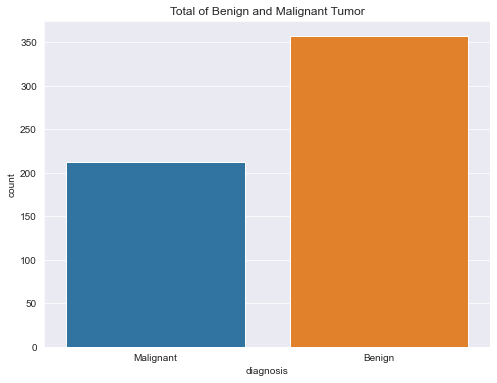

Total of Benign: 357
Total of Malignant 212


In [16]:
# Countplot with Totals of B and M tumores
plt.figure(figsize=(8,6))

Benign, Malignant = data.diagnosis.value_counts()

sns.countplot(data.diagnosis.replace({'B': 'Benign', 'M': 'Malignant'}), label='Count')
plt.title('Total of Benign and Malignant Tumor')
plt.show()

print('Total of Benign:', Benign)
print('Total of Malignant', Malignant)

**4. Check the distribution of the variables.**

Here we'll use histogram. The histogram shows us the distribution frequency of a set of continuous data. So we are able to inspect for its underlying distribution, outliers, skewness, kurtosis, etc.

First let's bring the data values to the same scale. For this, we'll use the z-score transformation. The intention of z-score is to transform data to have a mean of zero and a standard deviation of one.

In [17]:
# Segregate target variable
X = data.drop(columns='diagnosis')
y = data.diagnosis

In [18]:
# Scaler of independent variables
X = (X - X.mean())/ X.std()
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214


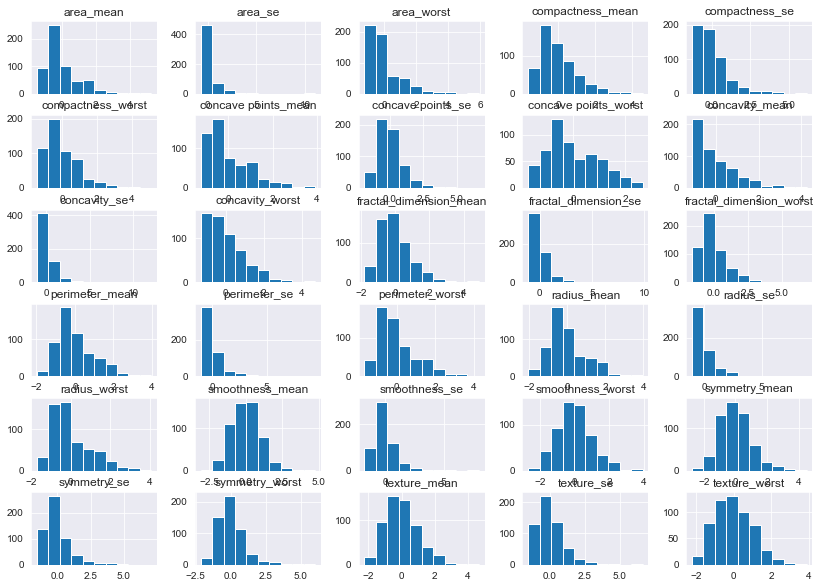

In [19]:
# X and y join of scaled data
data_scaled = X.join(y)

# Histogram
data_scaled.hist(figsize=(14,10));

**5. Check if ``['smoothness_worst']`` is gaussian distributed and analyse the skewness and kurtosis.**

The gaussian distribution means that, during any measurement, values will follow a normal distribution with an equal number of measurements above and below the mean value. It is in a bell-shaped curve.

We can see that on histogram plot, but sometimes it's better to confirm performing a Test of Normality. 

Here we'll use a **Shapiro-Wilt test**. This test assume that the null hypothesis is that the data was drawn from a normal distribution. So if the p-value of the test is:

* Larger than 0.05, we assume a normal distribution.
* Smaller than 0.05, we assume that the data is normally distributed.

We can also plot another graph named **QQPlot** (Quantile-Quantile Plot).

* **Skewness** measures the symmetry of a variable;
* **Kurtosis** measures the thickness of the tails.

> **5.a. Histogram with Density Plot**

Let's plot the ``['smoothness_worst']`` to see its distribution. It looks like a bell-shape (almost a Gaussian Distribution) lightly with a positive skewness. Let's analyse it.

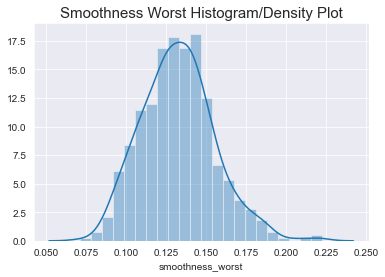

In [20]:
sns.distplot(data['smoothness_worst'])
plt.title('Smoothness Worst Histogram/Density Plot', fontsize=15);

> **5.b. Test of Normality**

In [21]:
pvalue = shapiro(data['smoothness_worst'])[1]

def is_normal():
    if pvalue >= 0.05:
        return 'normally distributed'
    else:
        return 'NOT normally distributed'
                                  
print(f'With 95% of confidence, \n the variable has a p-value of {pvalue}. \n So the variable is {is_normal()}.')

With 95% of confidence, 
 the variable has a p-value of 0.0002097362739732489. 
 So the variable is NOT normally distributed.


> **5.c. QQ-Plot**

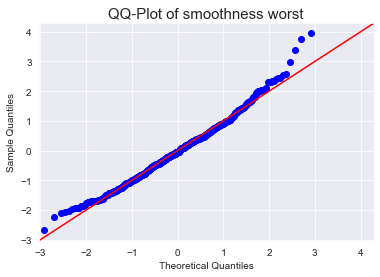

In [22]:
sm.qqplot(X['smoothness_worst'], line='45')
plt.title('QQ-Plot of smoothness worst', fontsize=15)
py.show()

We can see that the variable is almost a Gaussian Distribution. It can be noted on both extremes percentiles where dots are distant from the red line.

> **5.d. Kurtosis and Skewness**

In [23]:
print('Kurtosis:', kurtosis(data['smoothness_worst']))
print('Skewness:', skew(data['smoothness_worst']))

Kurtosis: 0.5027597471319547
Skewness: 0.41433004572343024


When the kurtosis and skewness are equals to ZERO, the distribution is a Gaussian Distribution. In this case, the ``['smoothness_worst']`` has:<br>

* Kurtosis > 0 - the distribution is *leptokurtic* (the thickness of the tail is large, so the distribution is tall)
* Skewness > 0 - the distribution is *positive* (the distribution walks to the left, having a long tail to the right comparing to the left)

So, the ``['smoothness_worst']`` variable is **not a Gaussian Distribution** but it's **almost** one.

**6. Boxplot Graph.**

Boxplot provides us information about the characteristics of the dataset, for example, dispersion, asymmetry and especially the presence of outliers. These are points that are far beyond most data points and can adversely affect decisions to be made. Let's see the figure below to better understand the characteristics of a boxplot:

<div style="text-align: center"><img src='img/boxplot.png' style="float:center;" width="700"></div>

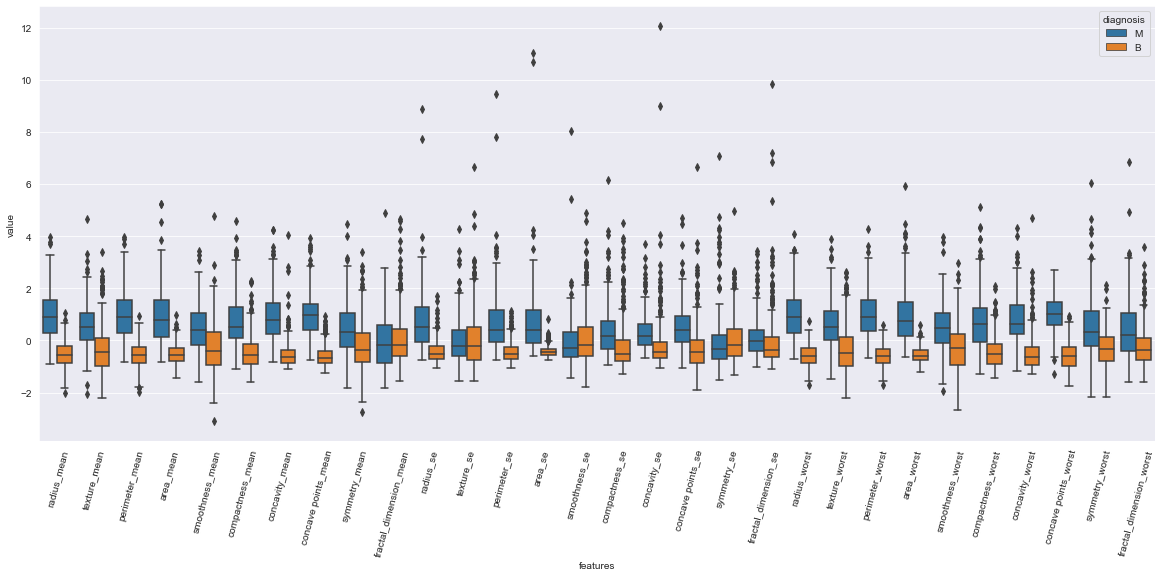

In [24]:
# Boxplot overview by diagnosis
plt.figure(figsize=(20,8))

data_norm_2 = pd.melt(data_scaled,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

sns.boxplot(data=data_norm_2, x='features', y='value', hue='diagnosis')
plt.xticks(rotation=75);

**7. Histogram/Density Plot of Tumor.**

The Kernel Density Plot also visualizes the distribution of data over an interval. It's a histogram variation that uses kernel smoothing due to plot values without noise. So it allow us to better see the distribution shape.

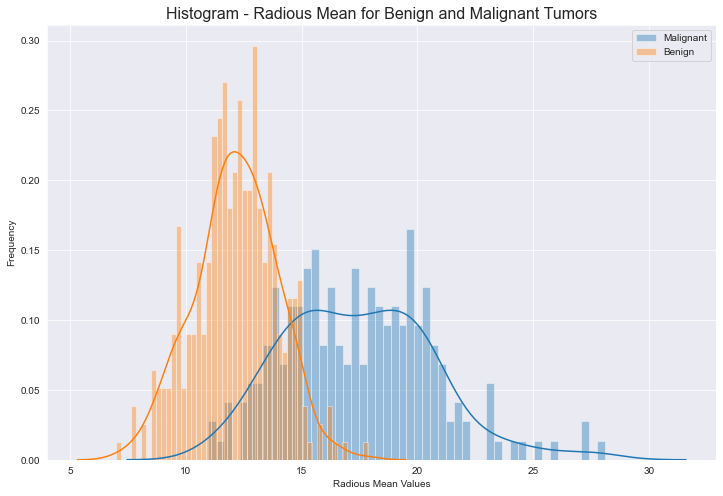

In [25]:
# Histogram and Density plot

plt.figure(figsize=(12,8))
sns.distplot(data.radius_mean[data.diagnosis == 'M'], bins=50, label='Malignant')
sns.distplot(data.radius_mean[data.diagnosis == 'B'], bins=50, label='Benign')
plt.legend()
plt.xlabel('Radious Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram - Radious Mean for Benign and Malignant Tumors', fontsize=16)
plt.show()

**8. Correlation.**

Correletion plot is an easy way to check the relationship between two variables. The correlation measures the direction and intensity of that relationship. The intensity ranges from -1 to 1. The closer to these values, the stronger the relationship. The closer to zero, the smaller the relationship.

The directuib tells us whether two variables are positively or negatively related. If positive, the slope of the relationship line is increasing. Otherwise, if negative, it is a descendant. If the data is dispersed, there is no correlation. Check the figure below:

<div style="text-align: center"><img src='img/correlation.png' style="float:center;" width="700"></div>

So let's see examples of correlation graph of dataset.

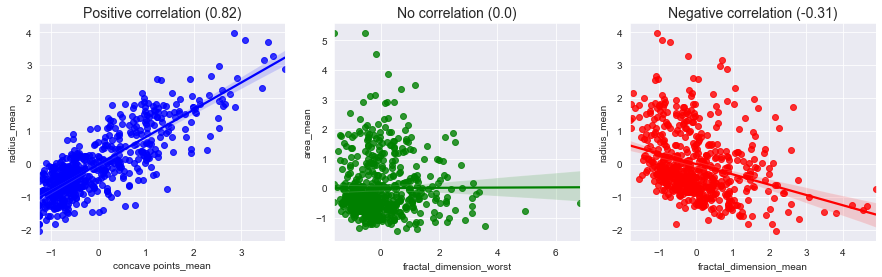

In [26]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.regplot(x=data_scaled['concave points_mean'], y=data_scaled['radius_mean'], color='blue')
plt.title('Positive correlation (0.82)', fontsize=14)

plt.subplot(1,3,2)
sns.regplot(x=data_scaled['fractal_dimension_worst'], y=data_scaled['area_mean'], color='green')
plt.title('No correlation (0.0)', fontsize=14)

plt.subplot(1,3,3)
sns.regplot(x=data_scaled['fractal_dimension_mean'], y=data_scaled['radius_mean'], color='red')
plt.title('Negative correlation (-0.31)', fontsize=14)
plt.show()

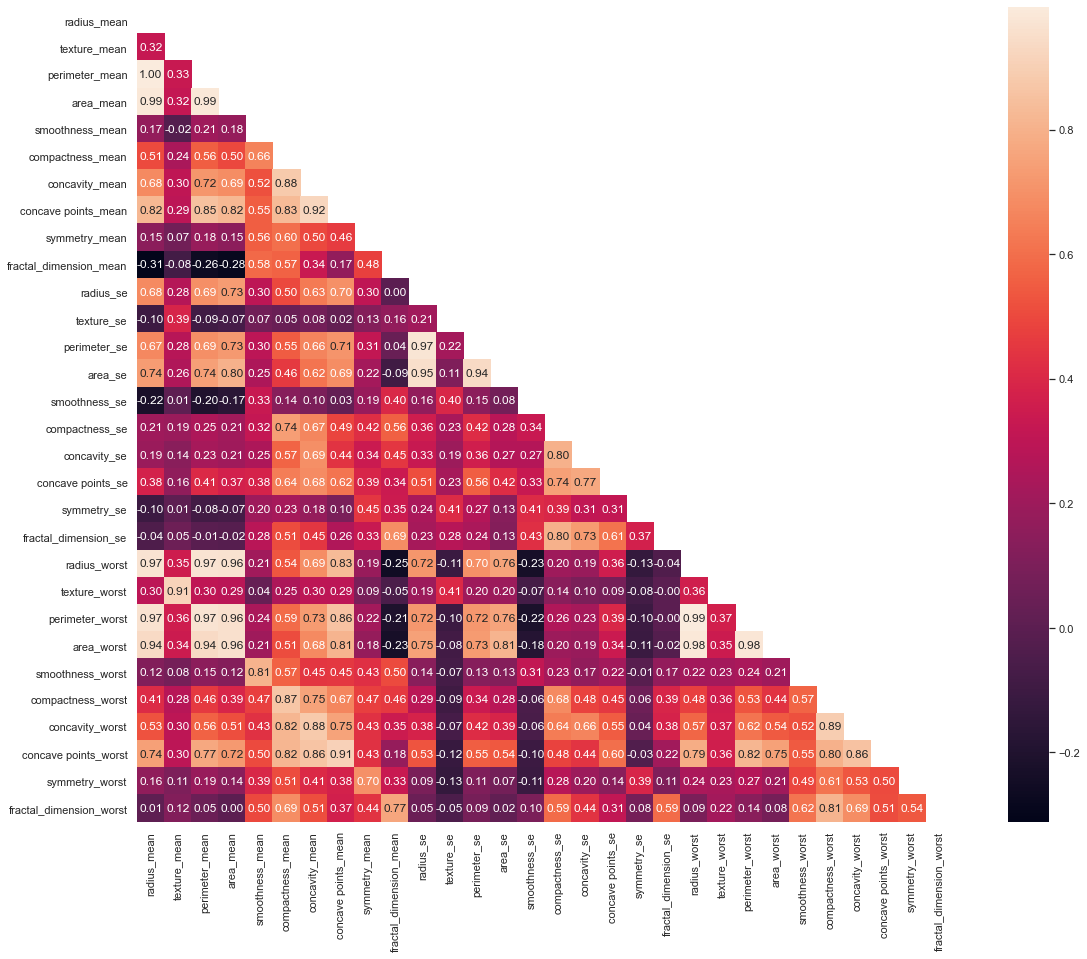

In [27]:
# Heatmap of correlation
plt.figure(figsize=(20,15))
sns.set(style='white')
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, square=True, mask= mask, annot=True, fmt='.2f');

**9. Removal of variables with high correlation.** 

So for that, we'll remove some variables with high correlation (starting from 0.90 of correlation). High correlation means that both variables gives almost the same information and that's not necessary to keep.

In [20]:
# Variables to drop
to_drop = ['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst',
          'area_worst', 'texture_worst', 'concave points_mean', 'perimeter_se', 'radius_se']

X.drop(columns=to_drop, inplace=True)

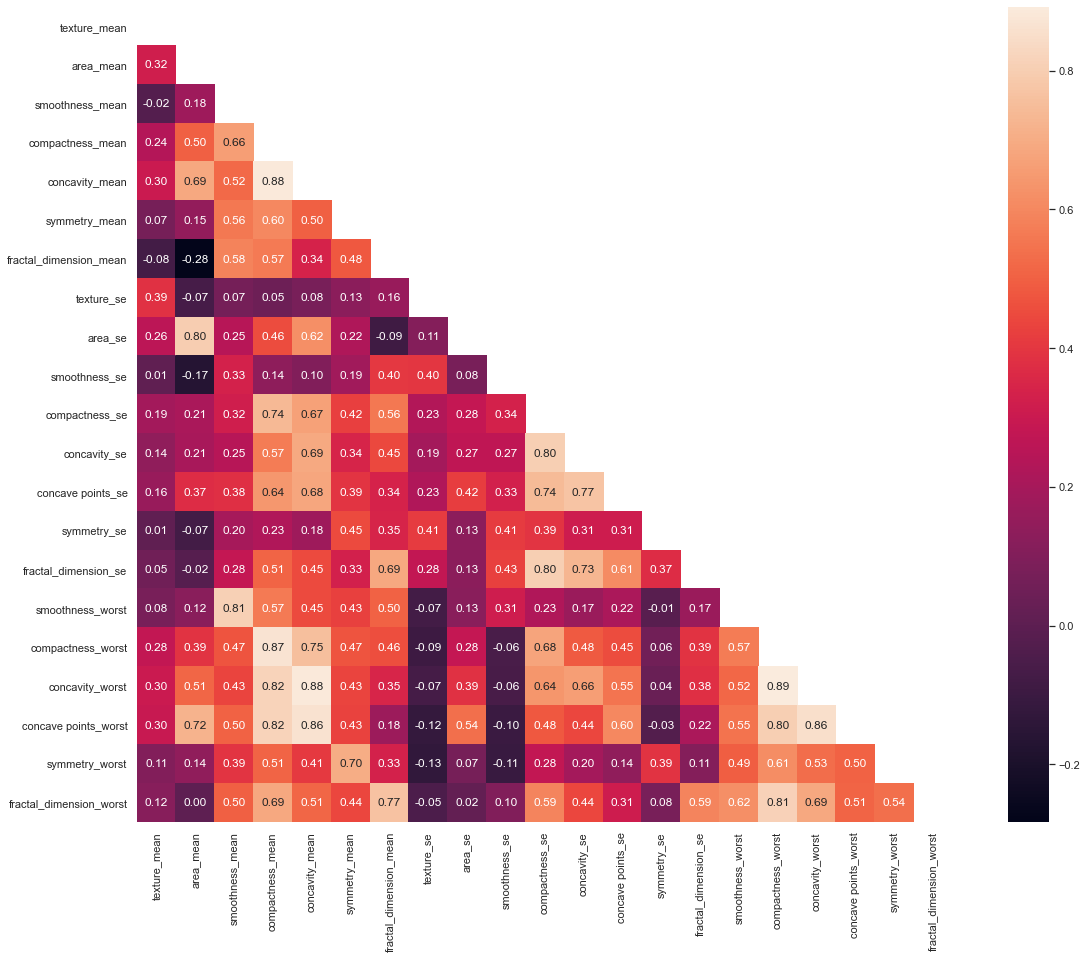

In [21]:
# Correlation heatmap plot after variables dropping
plt.figure(figsize=(20,15))
sns.set(style='white')
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, square=True, mask= mask, annot=True, fmt='.2f');

### **MACHINE LEARNING MODELING**

Now we're going to use some machine learning models to train our data due to predict future diagnosis of tumor.

**10. Split the dataset into train and test data.**

Our independent variables are already scaled. So let's split the data.

**Note 1**: It's a good practice to provide numerical inputs for Machine learning models to avoid technical glitches. Our target variable ``['diagnosis']`` is categorical. We need to transform it into numbers.
* "B" =  "0"
* "M" = "1"

**Note 2**: We'll use default parameters for each modeling then we'll choose the model that give us the best accuracy and ROC AUC.

**Note 3**:
<div style="text-align: center"><img src='img/cross val e accuracy.png' style="float:center;" width="800"></div>

**Note 4**: The ROC AUC shows us how well the model best distiguish between two classes. It goes from 0 to 1. Closer to 1, better.

In [299]:
# Train-test split
y = y.replace({'M': 1, 'B': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
print('train shape', X_train.shape)
print('test shape:', X_test.shape)

train shape (381, 21)
test shape: (188, 21)


In [301]:
y_train.value_counts()

0    236
1    145
Name: diagnosis, dtype: int64

**11. Random Forest Classifier**

RF is an ensemble technique that combines several models into one to improve its prediction power. It builds several decision trees (DT) to splits out a class prediction. The class with the most votes becomes the model's prediction.

<div style="text-align: center"><img src='img/randomforest.png' style="float:center;" width="800"></div>

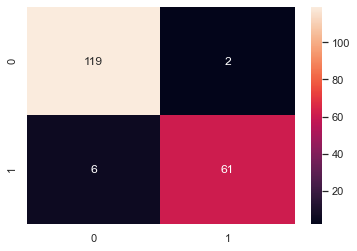

Accuracy: 0.9574
ROC AUC: 0.947


In [313]:
# Building the RF model
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Prediction
rf_pred = rf_model.predict(X_test)

# Accuracy and Confusion Matrix
accuracy_rf = accuracy_score(y_test,rf_pred)
confusion_mtx = confusion_matrix(y_test,rf_pred)
roc_auc_rf = roc_auc_score(y_test, rf_pred)

# Plot
sns.heatmap(confusion_mtx,annot=True,fmt="d")
plt.show()
print('Accuracy:',accuracy_rf.round(4))

# ROC AUC

print('ROC AUC:', roc_auc_rf.round(4))

**12. RFECV and Random Forest Classifier**

The Recursive Feature Elimination and Cross-Validated Selection (RFECV) removes the weakest feature(s) until a specified number of features is reached. So it give us the most important features that fits the model better.

Steps:
1. Fit RFECV model with original X and y trainning data (considered historical data);
2. Plot the graph of optimal number of features selected by RFECV (highest cv score);
3. Create a new X variable with the selected features;
4. Train-Test Split with new X;
5. Fit Random Forest model;
6. Predict with test data, plot cross validation and find accuracy.


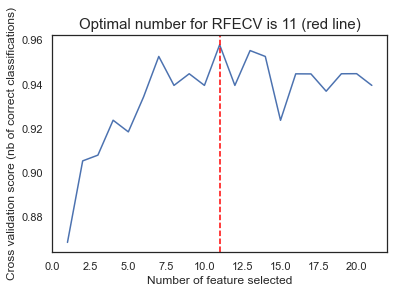


Best features: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [290]:
# Fit RFECV model with original X and y trainning data
cv = StratifiedKFold(5)
rfecv = RFECV(rf_model, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X_train, y_train)

#Plot the graph of optimal number of features selected by RFECV
plt.figure()
plt.xlabel('Number of feature selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.axvline(rfecv.n_features_, color='red', ls = '--')
plt.title(f'Optimal number for RFECV is {rfecv.n_features_} (red line)', fontsize=15)
plt.show()

print('\nBest features:', X_train.columns[rfecv.support_])

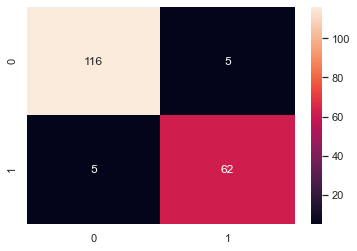

Accuracy (RFECV):  0.947
ROC AUC: 0.942


In [309]:
# Create a new X variable with the selected features
X_rfecv = X_train.columns[rfecv.support_].to_list()

# Train-Test Split with new X;
X_train_rfecv, X_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(X[X_rfecv], y, test_size=0.33, random_state=42)

# Fit Random Forest model
rfecv_model = RandomForestClassifier(random_state=42)
rfecv_model.fit(X_train_rfecv, y_train_rfecv)

# Prediction
rfecv_pred = rfecv_model.predict(X_test_rfecv)

# Confusion matrix, accuracy, ROC AUC 
accuracy_rfecv = accuracy_score(y_test_rfecv,rfecv_pred).round(3)
confusion_mtx_rfecv = confusion_matrix(y_test_rfecv,rfecv_pred)
roc_auc_rfecv = roc_auc_score(y_test_rfecv, rfecv_pred).round(3)

# plot
sns.heatmap(confusion_mtx_rfecv,annot=True,fmt="d")
plt.show()

# Accuracy
print('Accuracy (RFECV): ',accuracy_rfecv)

# ROC AUC
print('ROC AUC:', roc_auc_rfecv)

**13. Suport Vector Machine**

SVM finds an optimal boundary (hyperplane) wich is used to separate different classes. Check the figure below:

<div style="text-align: center"><img src='img/svm.png' style="float:center;" width="800"></div>

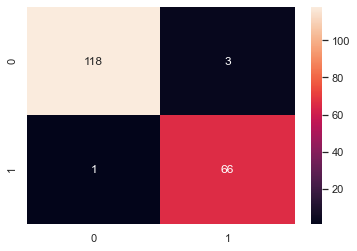

Accuracy (RFECV):  0.979
ROC AUC: 0.98


In [310]:
# Fit SVM Model
svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(X_train, y_train)

# Prediction
svm_pred = svm_model.predict(X_test)

# Confusion matrix, accuracy, ROC AUC
accuracy_svm = accuracy_score(y_test,svm_pred).round(3)
confusion_mtx_svm = confusion_matrix(y_test,svm_pred)
roc_auc_smv = roc_auc_score(y_test, svm_pred).round(3)

# plot
sns.heatmap(confusion_mtx_svm,annot=True,fmt="d")
plt.show()
print('Accuracy (RFECV): ',accuracy_svm)
print('ROC AUC:', roc_auc_smv)

In [354]:
dict_ = {"Accuracy": [accuracy_rf, accuracy_rfecv, accuracy_svm],
       "ROC_AUC": [roc_auc_rf, roc_auc_rfecv, roc_auc_smv]}

metrics = pd.DataFrame(dict_, index=['Random Forest', 'RF w/ RFECV', 'SVM']).sort_values(by='Accuracy', ascending=False)

def best_model():
    if listt[0] > (listt[1] and listt[2]):
        return 'Random Forest'
    elif listt[1] > (listt[0] and listt[2]):
        return 'RFECV w/ RF'
    elif listt[2] > (listt[1] and listt[0]):
        return 'Support Vector Machine (SVM)'
    else:
        '... ALERT: May be some identical accuracy. Check MODEL PREDICTIONS DATAFRAME below!'

print('\nBEST MODEL')
print('----------')
print(f"The best model with accuracy of {max(listt).round(2)} is {best_model()}.")


print('\n\nMETRICS OF MODELS')
print('-----------------')
metrics


BEST MODEL
----------
The best model with accuracy of 0.98 is Support Vector Machine (SVM).


METRICS OF MODELS
-----------------


,Accuracy,ROC_AUC
SVM,0.979000,0.980000
Random Forest,0.957447,0.946959
RF w/ RFECV,0.947000,0.942000


### FINAL THOUGHTS

In general, there are about 100 types of cancer that correspond to the various cells in our body. Cancer can be caused by several factors external or internal to the organism, contributing to the development of the disease. Breast cancer currently accounts for about 28% of new cancer cases in women and 1% in men. Accurate and early diagnosis is important to increase the chances of survival.

With the application of machine learning, we can detect the likelihood of a person having some type of cancer, whether benign or malignant. With this early discovery, we can treat the patient more appropriately, eliminating or minimizing the chances of the tumor evolving.

Thanks for reading. Keep in touch!

[GitHub](https://www.github.com/dspaulolima) | [LinkedIn](https://www.linkedin.com/in/dspaulolima)

<div style="text-align: center"><img src='img/2866426.jpg' style="float:center;" width="500"></div>

### REFERENCES

*Cancer*<br>
[Instituto Nacional de Câncer](https://www.inca.gov.br/tipos-de-cancer/cancer-de-mama)<br>
[Ministério da Saúde](http://www.saude.gov.br/saude-de-a-z/cancer-de-mama)
[World Cancer Research Fund](https://www.wcrf.org/dietandcancer/cancer-trends/breast-cancer-statistics)<br>
[Heathline](https://www.healthline.com/health/breast-cancer#treatment)<br>
[Breast Cancer](https://www.breastcancer.org)<br>
[Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470)<br>

*Tools and analysis sources*<br>
[Science Direct](https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gaussian-distribution)<br>
[DataViz](https://datavizcatalogue.com/methods/density_plot.html)<br>
[Shapiro-Wilk  & QQPlot](https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9) |
[SW DOC](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)<br>
[Random Forest](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0?source=search_post---------0) | [RF DOC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>
[Recursive Feature Elimination and Cross-Validated Selection DOC](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)<br>
[Support Vector Machine](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72) | [SVM DOC](https://scikit-learn.org/stable/modules/svm.html)<br>
[Correlation](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)<br>
[Google ML Crash Course](https://developers.google.com/machine-learning/crash-course/classification/accuracy)